## Projeto - Análise de Cartas de Magic The Gathering

O principal objetivo do projeto é aplicar os estudos realizados com Python e seus bibliotecas para Ciência de Dados.

Para o projeto de estudos, estamos considerando apenas as cartas que fazem parte do formato [Pionero](https://magic.wizards.com/pt-br/game-info/gameplay/formats/pioneer)



### Importanto as bibliotecas necessárias

**Pandas**: É uma biblioteca da linguagem Python para manipulação e análise de dados.

**Numpy**: É uma biblioteca para operações numéricas em Python, possui um objeto do tipo Array muito performático

In [1]:
import pandas as pd
import numpy as np

### Fonte dos Dados

[Kaggle](https://www.kaggle.com/mylesoneill/magic-the-gathering-cards?select=PioneerCards.json)

[Base de Dados - MTG](https://mtgjson.com/downloads/all-files/#pioneer)

In [2]:
# Importando o dataset
cards = pd.read_json('Arquivos/PioneerCards.json')

In [3]:
# Listando as 5 primeiras linhas
cards.head()

,Abandon Reason,Abandoned Sarcophagus,Abbot of Keral Keep,Aberrant Researcher,Abhorrent Overlord,Abnormal Endurance,Abolisher of Bloodlines,Abomination of Gudul,Abrade,Abrupt Decay,...,Zhalfirin Void,Zhur-Taa Ancient,Zhur-Taa Druid,Zhur-Taa Goblin,Zhur-Taa Swine,Zof Shade,Zulaport Chainmage,Zulaport Cutthroat,Zurgo Bellstriker,Zurgo Helmsmasher
colorIdentity,[R],[],[R],[U],[B],[B],[B],"[B, G, U]",[R],"[B, G]",...,[],"[G, R]","[G, R]","[G, R]","[G, R]",[B],[B],[B],[R],"[B, R, W]"
colors,[R],[],[R],[U],[B],[B],[],"[B, G, U]",[R],"[B, G]",...,[],"[G, R]","[G, R]","[G, R]","[G, R]",[B],[B],[B],[R],"[B, R, W]"
convertedManaCost,3,3,2,4,7,2,5,6,2,2,...,0,5,2,2,5,4,4,2,1,5
edhrecRank,7558,6972,6887,14063,1511,5999,2481,13679,1219,575,...,1164,4267,2106,11455,10375,16795,13853,172,6287,3121
foreignData,"[{'language': 'German', 'name': 'Abkehr von de...","[{'flavorText': 'Was einst ruhte, ruht nicht m...","[{'language': 'German', 'name': 'Abt des Keral...",[{'flavorText': '„Die Metamorphose ist ein and...,"[{'language': 'German', 'name': 'Verhasster Ob...","[{'flavorText': 'Die Hoffnung stirbt zuletzt, ...",[{'flavorText': 'Selbst wenn es Blut regnen wü...,"[{'language': 'German', 'name': 'Gudul-Scheußl...",[{'flavorText': 'Die Wüste ist eine hungrige B...,[{'flavorText': 'Die Izzet änderten rasch ihre...,...,[{'flavorText': '„Der Wind flüstert ‚Komm nach...,[{'flavorText': 'Viele Ravnicaner denken bei N...,"[{'flavorText': '„Nur die Dekadenten glauben, ...",[{'flavorText': 'Innerhalb des Zhur-Taa-Clans ...,"[{'flavorText': 'Gurley war der erste, der ein...",[{'flavorText': 'Schatten werden von Orten der...,[{'flavorText': 'Die Ketten gehorchen ihr. All...,[],"[{'language': 'German', 'name': 'Zurgo Glocken...","[{'language': 'Japanese', 'name': '兜砕きのズルゴ', '..."


Identificamos que as informações do Dataset estão com o nome das colunas todas as cartas válidas do formado, para melhor trabalhar com essas informações iremos transpor o Dataset.

In [4]:
# Transpondo o DataFrame: Escrevendo as colunas como linhas e vice-versa.
cards = cards.T

In [5]:
# Listando as 5 primeiras linhas com o novo formato.
cards.head()

,colorIdentity,colors,convertedManaCost,edhrecRank,foreignData,layout,legalities,manaCost,mtgoFoilId,mtgoId,...,mtgArenaId,power,toughness,faceConvertedManaCost,names,side,leadershipSkills,loyalty,colorIndicator,hasNoDeckLimit
Abandon Reason,[R],[R],3,7558,"[{'language': 'German', 'name': 'Abkehr von de...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{2}{R},61409,61408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abandoned Sarcophagus,[],[],3,6972,"[{'flavorText': 'Was einst ruhte, ruht nicht m...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{3},64841,64840,...,65833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abbot of Keral Keep,[R],[R],2,6887,"[{'language': 'German', 'name': 'Abt des Keral...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{1}{R},58043,58042,...,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aberrant Researcher,[U],[U],4,14063,[{'flavorText': '„Die Metamorphose ist ein and...,transform,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{3}{U},59887,59886,...,NaN,3,2,4,"[Aberrant Researcher, Perfected Form]",a,NaN,NaN,NaN,NaN
Abhorrent Overlord,[B],[B],7,1511,"[{'language': 'German', 'name': 'Verhasster Ob...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{5}{B}{B},50401,50400,...,NaN,6,6,NaN,[],NaN,NaN,NaN,NaN,NaN


- Como pudemos identificar, nosso Dataset possui **31** colunas.
- Nosso index está considerando o nome das cartas, iremos alterar para trabalhar com um sequencial.

In [6]:
# Criando uma nova coluna para ser o meu index
cards['index'] = range(0,cards.shape[0]) # de 0 até a quantidade máxima de linhas

In [7]:
# Definindo que a coluna 'index' será o meu novo index.
cards = cards.set_index('index')

In [8]:
# Retornando 5 valores aleatórios do dataframe
cards.sample(5)

,colorIdentity,colors,convertedManaCost,edhrecRank,foreignData,layout,legalities,manaCost,mtgoFoilId,mtgoId,...,mtgArenaId,power,toughness,faceConvertedManaCost,names,side,leadershipSkills,loyalty,colorIndicator,hasNoDeckLimit
index,,,,,,,,,,,,,,,,,,,,,
4319,[G],[G],2,4406,[{'flavorText': '„Du hättest den Gesichtsausdr...,normal,"{'brawl': 'Legal', 'commander': 'Legal', 'duel...",{1}{G},NaN,68551,...,68070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5350,"[R, U]",[],0,856,[{'flavorText': 'Abseits der ausgetretenen Pfa...,normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",NaN,61852,61851,...,64137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5198,[],[],3,8422,"[{'language': 'German', 'name': 'Rüstung des M...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{3},60109,60108,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
5901,[],[],2,12973,"[{'flavorText': '„Guten Morgen, Kinder. Öffnet...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{2},62070,62069,...,64113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,[B],[B],4,13858,[{'flavorText': '„Dein Todeskampf wird nur ein...,normal,"{'brawl': 'Legal', 'commander': 'Legal', 'duel...",{3}{B},NaN,73065,...,69868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Indice alterado
- Agora iremos executar alguns métodos/atributos do das bibliotecas para que identifiquemos algumas informações do nosso dataset.

In [9]:
# Retornando o nome das colunas
cards.columns

Index(['colorIdentity', 'colors', 'convertedManaCost', 'edhrecRank',
       'foreignData', 'layout', 'legalities', 'manaCost', 'mtgoFoilId',
       'mtgoId', 'name', 'printings', 'purchaseUrls', 'rulings',
       'scryfallOracleId', 'subtypes', 'supertypes', 'text', 'type', 'types',
       'uuid', 'mtgArenaId', 'power', 'toughness', 'faceConvertedManaCost',
       'names', 'side', 'leadershipSkills', 'loyalty', 'colorIndicator',
       'hasNoDeckLimit'],
      dtype='object')

In [10]:
# Verificando a quantidade de linhas x colunas do Dataframe
cards.shape

(6567, 31)

In [11]:
# Retornando informações estatísticas do dataframe
cards.describe()

,colorIdentity,colors,convertedManaCost,edhrecRank,foreignData,layout,legalities,manaCost,mtgoFoilId,mtgoId,...,mtgArenaId,power,toughness,faceConvertedManaCost,names,side,leadershipSkills,loyalty,colorIndicator,hasNoDeckLimit
count,6567,6567,6567.0,6553,6567,6567,6567,6283,3687,5419,...,2661,3579,3579,321.0,853,330,429,150,37,3
unique,27,35,14.0,6395,5794,7,28,381,3629,5301,...,2605,17,17,8.0,165,3,2,7,7,1
top,[B],[W],3.0,15329,[],normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{1}{W},61133,61462,...,70470,2,2,2.0,[],b,"{'brawl': False, 'commander': True, 'oathbreak...",5,[R],True
freq,980,989,1525.0,2,774,6223,1885,238,2,2,...,2,1129,925,72.0,523,164,278,59,10,3


In [12]:
# Retornando informações sobre as colunas, os dtypes, uso de memória
cards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6567 entries, 0 to 6566
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   colorIdentity          6567 non-null   object
 1   colors                 6567 non-null   object
 2   convertedManaCost      6567 non-null   object
 3   edhrecRank             6553 non-null   object
 4   foreignData            6567 non-null   object
 5   layout                 6567 non-null   object
 6   legalities             6567 non-null   object
 7   manaCost               6283 non-null   object
 8   mtgoFoilId             3687 non-null   object
 9   mtgoId                 5419 non-null   object
 10  name                   6567 non-null   object
 11  printings              6567 non-null   object
 12  purchaseUrls           5961 non-null   object
 13  rulings                6567 non-null   object
 14  scryfallOracleId       6567 non-null   object
 15  subtypes             

## Tratando o dataframe
- Remover as colunas que não serão necessárias para a nossa análise.
- Tratando os valores nulos
- Há valores do tipo Lista dentro do Dataframe, precisamos tratá-los também.
    - Colunas: colors, types, subtypes, printings, manaCost, supertypes
- Tratando os tipos das colunas

**Fonte Descrição dos Campos:**
- https://mtgjson.com/file-models/card-atomic/

In [13]:
# Removendo colunas que não serão utilizadas para a análise seguindo a documentação
colunasRemovidas = ['hasNoDeckLimit', 'colorIndicator', 'leadershipSkills', 'names', 'mtgArenaId', 'uuid', 'text',
                   'scryfallOracleId', 'rulings', 'purchaseUrls', 'mtgoId', 'mtgoFoilId', 'legalities', 'foreignData',
                   'edhrecRank', 'colorIdentity', 'faceConvertedManaCost','type', 'side', 'printings']

#Dropando as colunas e atualizando em memória
cards.drop(colunasRemovidas, axis=1, inplace=True)

In [14]:
# Listando o novo dataframe somente com as colunas que serão analisadas.
cards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6567 entries, 0 to 6566
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   colors             6567 non-null   object
 1   convertedManaCost  6567 non-null   object
 2   layout             6567 non-null   object
 3   manaCost           6283 non-null   object
 4   name               6567 non-null   object
 5   subtypes           6567 non-null   object
 6   supertypes         6567 non-null   object
 7   types              6567 non-null   object
 8   power              3579 non-null   object
 9   toughness          3579 non-null   object
 10  loyalty            150 non-null    object
dtypes: object(11)
memory usage: 615.7+ KB


In [15]:
#Listando todas as colunas que possuem valores nulos.
cards.isnull().sum()

colors                  0
convertedManaCost       0
layout                  0
manaCost              284
name                    0
subtypes                0
supertypes              0
types                   0
power                2988
toughness            2988
loyalty              6417
dtype: int64

- A coluna manaCost possui **284** valores nulos
- A coluna power possui **2988** valores nulos
- A coluna toughness possui **2988** valores nulos
- A coluna loyalty possui **6417** valores nulos


In [16]:
# Tratando os valores nulos - ManaCost
# Quando não há custo de mana, considera-se que a carta não possui custo
cards['manaCost'].fillna(0, inplace=True)

In [17]:
# Tratando valores nulos - power
# Sugestão: Fazer uma análise mais detalhada para verificar se as cartas que não registram poder são Sorcery ou instants
cards['power'].fillna(0, inplace=True)

In [18]:
# Tratando valores nulos - toughness
# Sugestão: Fazer uma análise mais detalhada para verificar se as cartas que não registram toughness são Sorcery ou instants
cards['toughness'].fillna(0, inplace=True)

In [19]:
# Tratando valores nulos - loyalty
# Sugestão: Verificar se apenas cartas PW possuem loyalty
# PW não podem vim com loyalty 0
cards['loyalty'].fillna(0, inplace=True)

In [20]:
# Não há mais nenhum valor nulo
cards.isnull().sum()

colors               0
convertedManaCost    0
layout               0
manaCost             0
name                 0
subtypes             0
supertypes           0
types                0
power                0
toughness            0
loyalty              0
dtype: int64

In [21]:
# Convertendo a coluna types do tipo lista para Strings
# sugestão: Destrinchar isso aqui para melhor entendimento.
cardsTypes = cards['types'].apply(pd.Series)
cardsTypes.drop(1, axis=1, inplace=True)
cardsTypes.set_index(0)
cards['types'] = cardsTypes
cards.head()

,colors,convertedManaCost,layout,manaCost,name,subtypes,supertypes,types,power,toughness,loyalty
index,,,,,,,,,,,
0,[R],3,normal,{2}{R},Abandon Reason,[],[],Instant,0,0,0
1,[],3,normal,{3},Abandoned Sarcophagus,[],[],Artifact,0,0,0
2,[R],2,normal,{1}{R},Abbot of Keral Keep,"[Human, Monk]",[],Creature,2,1,0
3,[U],4,transform,{3}{U},Aberrant Researcher,"[Human, Insect]",[],Creature,3,2,0
4,[B],7,normal,{5}{B}{B},Abhorrent Overlord,[Demon],[],Creature,6,6,0


In [22]:
# Trabalhando a coluna colors
pd.value_counts(cards['colors'])


TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[W]                989
[R]                968
[G]                960
[B]                960
[U]                953
[]                 851
[G, R]              81
[B, G]              80
[U, W]              80
[B, W]              80
[G, U]              79
[B, R]              77
[R, W]              74
[B, U]              74
[G, W]              74
[R, U]              73
[B, G, U]           10
[R, U, W]           10
[G, R, U]           10
[B, R, W]           10
[B, G, W]            9
[W, G]               7
[B, R, U]            7
[R, G]               5
[U, R]               5
[U, B]               5
[W, R]               5
[W, B]               5
[U, G]               5
[W, U]               5
[G, R, W]            4
[B, G, R, U, W]      4
[B, G, R]            3
[G, U, W]            3
[B, U, W]            2
Name: colors, dtype: int64

In [23]:
cardsColors = pd.DataFrame(cards['colors'])

In [24]:
# Iterar o dataframe para preencher os valores em formato de string
# Melhorar esse código - Talvez pensar em um método.
for (key,item) in cardsColors.iterrows():
    if (len(item['colors']) == 0):
        cardsColors.loc[key,'Cores'] = 'Colorless'
    elif (len(item['colors']) >= 2):
        cardsColors.loc[key,'Cores'] = 'Multicolor'
    elif (item['colors'].count('R') == 1):
        cardsColors.loc[key,'Cores'] = 'Red'
    elif (item['colors'].count('W') == 1):
        cardsColors.loc[key,'Cores'] = 'White'
    elif (item['colors'].count('G') == 1):
        cardsColors.loc[key,'Cores'] = 'Green'
    elif (item['colors'].count('U') == 1):
        cardsColors.loc[key,'Cores'] = 'Blue'
    elif (item['colors'].count('B') == 1):
        cardsColors.loc[key,'Cores'] = 'Black'
   

In [25]:
# Recuperando só o as cores
cardsColors.drop(columns='colors', inplace=True)

In [26]:
cardsColors

,Cores
index,
0,Red
1,Colorless
2,Red
3,Blue
4,Black
...,...
6562,Black
6563,Black
6564,Black


In [27]:
# Concatenando a lista de Cores com o dataframe original
cards = pd.merge(cards, cardsColors, on='index')
# Deletando a coluna colors do dataframe original
cards.drop(columns='colors', inplace=True)
cards

,convertedManaCost,layout,manaCost,name,subtypes,supertypes,types,power,toughness,loyalty,Cores
index,,,,,,,,,,,
0,3,normal,{2}{R},Abandon Reason,[],[],Instant,0,0,0,Red
1,3,normal,{3},Abandoned Sarcophagus,[],[],Artifact,0,0,0,Colorless
2,2,normal,{1}{R},Abbot of Keral Keep,"[Human, Monk]",[],Creature,2,1,0,Red
3,4,transform,{3}{U},Aberrant Researcher,"[Human, Insect]",[],Creature,3,2,0,Blue
4,7,normal,{5}{B}{B},Abhorrent Overlord,[Demon],[],Creature,6,6,0,Black
...,...,...,...,...,...,...,...,...,...,...,...
6562,4,normal,{3}{B},Zof Shade,[Shade],[],Creature,2,2,0,Black
6563,4,normal,{3}{B},Zulaport Chainmage,"[Human, Shaman, Ally]",[],Creature,4,2,0,Black
6564,2,normal,{1}{B},Zulaport Cutthroat,"[Human, Rogue, Ally]",[],Creature,1,1,0,Black


In [28]:
# Trabalhando a coluna subtypes
cards['subtypes']

index
0                          []
1                          []
2               [Human, Monk]
3             [Human, Insect]
4                     [Demon]
                ...          
6562                  [Shade]
6563    [Human, Shaman, Ally]
6564     [Human, Rogue, Ally]
6565           [Orc, Warrior]
6566           [Orc, Warrior]
Name: subtypes, Length: 6567, dtype: object

In [29]:
# Podemos ver que é importante manter todos os valores
# Para facilitar a manipulação e a visualização, transformaremos a lista em um dataframe
subtypes_df = cards['subtypes'].apply(pd.Series)
subtypes_df

,0,1,2
index,,,
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,Human,Monk,NaN
3,Human,Insect,NaN
4,Demon,NaN,NaN
...,...,...,...
6562,Shade,NaN,NaN
6563,Human,Shaman,Ally
6564,Human,Rogue,Ally


In [30]:
# Tratando os valores nulos
subtypes_df.fillna("", inplace=True)
subtypes_df

,0,1,2
index,,,
0,,,
1,,,
2,Human,Monk,
3,Human,Insect,
4,Demon,,
...,...,...,...
6562,Shade,,
6563,Human,Shaman,Ally
6564,Human,Rogue,Ally


In [31]:
# Renomeando o nome da colunas
colunas_subtypes = {0:'sybtypes1', 1:'subtypes2', 2:'subtypes3'}
subtypes_df.rename(columns = colunas_subtypes, inplace=True)
subtypes_df

,sybtypes1,subtypes2,subtypes3
index,,,
0,,,
1,,,
2,Human,Monk,
3,Human,Insect,
4,Demon,,
...,...,...,...
6562,Shade,,
6563,Human,Shaman,Ally
6564,Human,Rogue,Ally


In [32]:
# Concatenando com o dataframe original
cards = pd.merge(cards, subtypes_df, on='index')
cards

,convertedManaCost,layout,manaCost,name,subtypes,supertypes,types,power,toughness,loyalty,Cores,sybtypes1,subtypes2,subtypes3
index,,,,,,,,,,,,,,
0,3,normal,{2}{R},Abandon Reason,[],[],Instant,0,0,0,Red,,,
1,3,normal,{3},Abandoned Sarcophagus,[],[],Artifact,0,0,0,Colorless,,,
2,2,normal,{1}{R},Abbot of Keral Keep,"[Human, Monk]",[],Creature,2,1,0,Red,Human,Monk,
3,4,transform,{3}{U},Aberrant Researcher,"[Human, Insect]",[],Creature,3,2,0,Blue,Human,Insect,
4,7,normal,{5}{B}{B},Abhorrent Overlord,[Demon],[],Creature,6,6,0,Black,Demon,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6562,4,normal,{3}{B},Zof Shade,[Shade],[],Creature,2,2,0,Black,Shade,,
6563,4,normal,{3}{B},Zulaport Chainmage,"[Human, Shaman, Ally]",[],Creature,4,2,0,Black,Human,Shaman,Ally
6564,2,normal,{1}{B},Zulaport Cutthroat,"[Human, Rogue, Ally]",[],Creature,1,1,0,Black,Human,Rogue,Ally


In [33]:
# Removendo a antiga coluna sybtypes
cards.drop(columns='subtypes', axis=1, inplace=True)
cards

,convertedManaCost,layout,manaCost,name,supertypes,types,power,toughness,loyalty,Cores,sybtypes1,subtypes2,subtypes3
index,,,,,,,,,,,,,
0,3,normal,{2}{R},Abandon Reason,[],Instant,0,0,0,Red,,,
1,3,normal,{3},Abandoned Sarcophagus,[],Artifact,0,0,0,Colorless,,,
2,2,normal,{1}{R},Abbot of Keral Keep,[],Creature,2,1,0,Red,Human,Monk,
3,4,transform,{3}{U},Aberrant Researcher,[],Creature,3,2,0,Blue,Human,Insect,
4,7,normal,{5}{B}{B},Abhorrent Overlord,[],Creature,6,6,0,Black,Demon,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6562,4,normal,{3}{B},Zof Shade,[],Creature,2,2,0,Black,Shade,,
6563,4,normal,{3}{B},Zulaport Chainmage,[],Creature,4,2,0,Black,Human,Shaman,Ally
6564,2,normal,{1}{B},Zulaport Cutthroat,[],Creature,1,1,0,Black,Human,Rogue,Ally


In [34]:
# Trabalhando com a coluna supertypes
supertypes_df = cards['supertypes'].apply(pd.Series)
supertypes_df

,0
index,
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6562,NaN
6563,NaN
6564,NaN


In [35]:
# Tratando os valores nulos e alterando o nome da coluna
supertypes_columns = {0:'supertypes'}
supertypes_df.rename(columns=supertypes_columns, inplace=True)
supertypes_df.fillna("Não se aplica",inplace=True)
supertypes_df

,supertypes
index,
0,Não se aplica
1,Não se aplica
2,Não se aplica
3,Não se aplica
4,Não se aplica
...,...
6562,Não se aplica
6563,Não se aplica
6564,Não se aplica


In [36]:
# Atribuindo os valores do dataframe do supertypes para o original
cards['supertypes'] = supertypes_df['supertypes']
cards

,convertedManaCost,layout,manaCost,name,supertypes,types,power,toughness,loyalty,Cores,sybtypes1,subtypes2,subtypes3
index,,,,,,,,,,,,,
0,3,normal,{2}{R},Abandon Reason,Não se aplica,Instant,0,0,0,Red,,,
1,3,normal,{3},Abandoned Sarcophagus,Não se aplica,Artifact,0,0,0,Colorless,,,
2,2,normal,{1}{R},Abbot of Keral Keep,Não se aplica,Creature,2,1,0,Red,Human,Monk,
3,4,transform,{3}{U},Aberrant Researcher,Não se aplica,Creature,3,2,0,Blue,Human,Insect,
4,7,normal,{5}{B}{B},Abhorrent Overlord,Não se aplica,Creature,6,6,0,Black,Demon,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6562,4,normal,{3}{B},Zof Shade,Não se aplica,Creature,2,2,0,Black,Shade,,
6563,4,normal,{3}{B},Zulaport Chainmage,Não se aplica,Creature,4,2,0,Black,Human,Shaman,Ally
6564,2,normal,{1}{B},Zulaport Cutthroat,Não se aplica,Creature,1,1,0,Black,Human,Rogue,Ally


In [37]:
# Tratando o tipo das colunas
# Por que tratar ? Para diminuir o consumo de memória, além de que alguns tipos nos disponibilizam mais informações estatísticas.
cards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6567 entries, 0 to 6566
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   convertedManaCost  6567 non-null   object
 1   layout             6567 non-null   object
 2   manaCost           6567 non-null   object
 3   name               6567 non-null   object
 4   supertypes         6567 non-null   object
 5   types              6567 non-null   object
 6   power              6567 non-null   object
 7   toughness          6567 non-null   object
 8   loyalty            6567 non-null   object
 9   Cores              6567 non-null   object
 10  sybtypes1          6567 non-null   object
 11  subtypes2          6567 non-null   object
 12  subtypes3          6567 non-null   object
dtypes: object(13)
memory usage: 718.3+ KB


In [38]:
# Colunas convertedManaCost é uma coluna numérica.
cards.convertedManaCost = cards.convertedManaCost.astype(np.int64)

## Agora temos um Dataframe tratado que podemos utilizar para gerar análises
- Análise do total do custo de mana das cartas
- Análise do Supertipo
- Relação Supertipo x Tipo
- Análise sobre os Planeswalkers
- Total de Cores

In [39]:
# Cards separadas por Total de Mana Convertida
pd.value_counts(cards['convertedManaCost'], sort=False)

0      226
4     1180
8       54
12       3
1      643
5      788
9       24
13       1
2     1421
6      489
10      10
3     1525
7      197
11       6
Name: convertedManaCost, dtype: int64

- Podemos verificar que a maiora das cartas tem seu **custo total 3, seguidos de 2 e 4**
- Só existe **uma** carta com **custo 13** no formato Pionero do Magic The Gathering

In [40]:
# Cards seperados pelo Super Tipo
pd.value_counts(cards['supertypes'])

Não se aplica    6047
Legendary         514
Basic               6
Name: supertypes, dtype: int64

In [41]:
# PIVOT - Relacionando supertypes x types
cards.pivot_table('name', index=['supertypes','types'], aggfunc='count', margins=True)

name
supertypes    types             
Basic         Land             6
Legendary     Artifact        42
              Creature       260
              Enchantment     40
              Land            15
              Planeswalker   151
              Sorcery          6
Não se aplica Artifact       460
              Creature      3055
              Enchantment    617
              Instant        909
              Land           205
              Sorcery        801
All                         6567

In [42]:
# Listar as cartas com supertipo Basic
cards.loc[(cards['supertypes'] == 'Basic')]

,convertedManaCost,layout,manaCost,name,supertypes,types,power,toughness,loyalty,Cores,sybtypes1,subtypes2,subtypes3
index,,,,,,,,,,,,,
2127,0,normal,0,Forest,Basic,Land,0,0,0,Colorless,Forest,,
2960,0,normal,0,Island,Basic,Land,0,0,0,Colorless,Island,,
3684,0,normal,0,Mountain,Basic,Land,0,0,0,Colorless,Mountain,,
4160,0,normal,0,Plains,Basic,Land,0,0,0,Colorless,Plains,,
5579,0,normal,0,Swamp,Basic,Land,0,0,0,Colorless,Swamp,,
6349,0,normal,0,Wastes,Basic,Land,0,0,0,Colorless,,,


- Temos um total de **514** cartas com supertipo Lendária
    - Podemos ver que das 514 a maioria das cartas são do **tipo Criatura, totalizando 260**.
- O supertipo **Basic** possui apenas 6 cartas e todas elas são do **tipo Terreno**
- **Só** temos cartas do tipo planeswalker com **supertipo lendária**, totalizando **151**.

In [43]:
# Listando informações sobre os Planeswalkers
planeswalker_df = cards.loc[(cards['types'] == 'Planeswalker')]
planeswalker_df

,convertedManaCost,layout,manaCost,name,supertypes,types,power,toughness,loyalty,Cores,sybtypes1,subtypes2,subtypes3
index,,,,,,,,,,,,,
123,4,normal,{3}{W},Ajani Steadfast,Legendary,Planeswalker,0,0,4,White,Ajani,,
124,6,normal,{4}{G}{W},Ajani Unyielding,Legendary,Planeswalker,0,0,4,Multicolor,Ajani,,
133,4,normal,{2}{W}{W},"Ajani, Adversary of Tyrants",Legendary,Planeswalker,0,0,4,White,Ajani,,
134,3,normal,{1}{W}{W},"Ajani, Caller of the Pride",Legendary,Planeswalker,0,0,4,White,Ajani,,
135,6,normal,{4}{W}{W},"Ajani, Inspiring Leader",Legendary,Planeswalker,0,0,5,White,Ajani,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6279,7,normal,{5}{B}{G},"Vraska, Regal Gorgon",Legendary,Planeswalker,0,0,5,Multicolor,Vraska,,
6280,6,normal,{4}{B}{G},"Vraska, Relic Seeker",Legendary,Planeswalker,0,0,6,Multicolor,Vraska,,
6281,6,normal,{4}{B}{B},"Vraska, Scheming Gorgon",Legendary,Planeswalker,0,0,5,Black,Vraska,,


In [44]:
# Relação Cores x Lealdade
planeswalker_df.pivot_table('name', index=['Cores','loyalty'], aggfunc='count', margins=True)

name
Cores      loyalty      
Black      3           4
           4           4
           5           6
           6           1
Blue       2           1
           3           1
           4           5
           5           8
Colorless  4           1
           5           2
           7           1
Green      3           5
           4           3
           5           6
           7           1
Multicolor 0           1
           2           1
           3          11
           4          22
           5          22
           6           4
           7           5
           X           1
Red        3           1
           4           8
           5           9
           6           1
White      3           2
           4           8
           5           6
All                  151

In [45]:
planeswalker_df.loc[(planeswalker_df['loyalty'] == 0) | (planeswalker_df['loyalty'] == 'X')]

,convertedManaCost,layout,manaCost,name,supertypes,types,power,toughness,loyalty,Cores,sybtypes1,subtypes2,subtypes3
index,,,,,,,,,,,,,
305,4,transform,0,"Arlinn, Embraced by the Moon",Legendary,Planeswalker,0,0,0,Multicolor,Arlinn,,
3837,2,normal,{X}{G}{U},"Nissa, Steward of Elements",Legendary,Planeswalker,0,0,X,Multicolor,Nissa,,


- Existe **1** planeswalker multicolor que possui lealdade 0
- Existe **1** planeswalker multicolor que possui lealdade X

In [46]:
planeswalker_df.pivot_table('name', index=['Cores'], aggfunc='count',margins=True)

,name
Cores,
Black,15
Blue,15
Colorless,4
Green,15
Multicolor,67
Red,19
White,16
All,151


- **Planeswalker Multicoloridos** são mais comuns, totalizando **67**
- **Planeswalker Colorless** são menos comuns, totalizando **4**

In [47]:
# Total das cores das cartas
cards.pivot_table('name', index=['Cores'], aggfunc='count', margins=True)

,name
Cores,
Black,960
Blue,953
Colorless,851
Green,960
Multicolor,886
Red,968
White,989
All,6567


- A maioria das cartas são cor branca, totalizando **989**
- E a minoria são as cartas sem cor, totalizando **851**

## Representações gráficas

<AxesSubplot:>

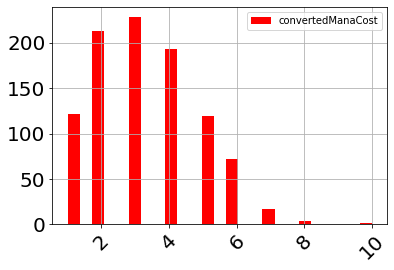

In [48]:
# Histograma de Custo de Mana da cor vermelha
cards_red_df = cards.loc[(cards['Cores'] == 'Red')]
cards_red_df['convertedManaCost'].hist(bins=25, color='red', xrot=45, ylabelsize=20, xlabelsize=20, legend=True)

<AxesSubplot:>

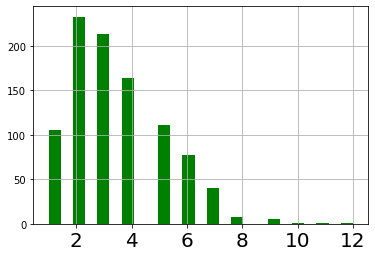

In [49]:
# Histograma de Custo de Mana da cor verde
cards['convertedManaCost'].loc[(cards['Cores'] == 'Green')].hist(bins=25, color='Green', xlabelsize=20)

<AxesSubplot:>

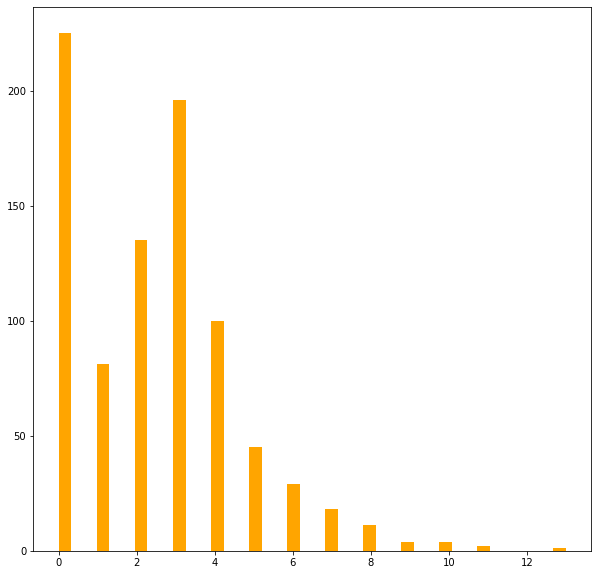

In [50]:
# Histograma de Custo de Mana da cartas sem cor
cards['convertedManaCost'].loc[(cards['Cores'] == 'Colorless')].hist(bins=40, color='orange', grid=False, figsize=(10,10))

In [51]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6567 entries, 0 to 6566
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   convertedManaCost  6567 non-null   int64 
 1   layout             6567 non-null   object
 2   manaCost           6567 non-null   object
 3   name               6567 non-null   object
 4   supertypes         6567 non-null   object
 5   types              6567 non-null   object
 6   power              6567 non-null   object
 7   toughness          6567 non-null   object
 8   loyalty            6567 non-null   object
 9   Cores              6567 non-null   object
 10  sybtypes1          6567 non-null   object
 11  subtypes2          6567 non-null   object
 12  subtypes3          6567 non-null   object
dtypes: int64(1), object(12)
memory usage: 718.3+ KB


<AxesSubplot:title={'center':'Custo de mana convertido x Cores'}, xlabel='Custo de Mana Convertido', ylabel='Quantidade de cartas'>

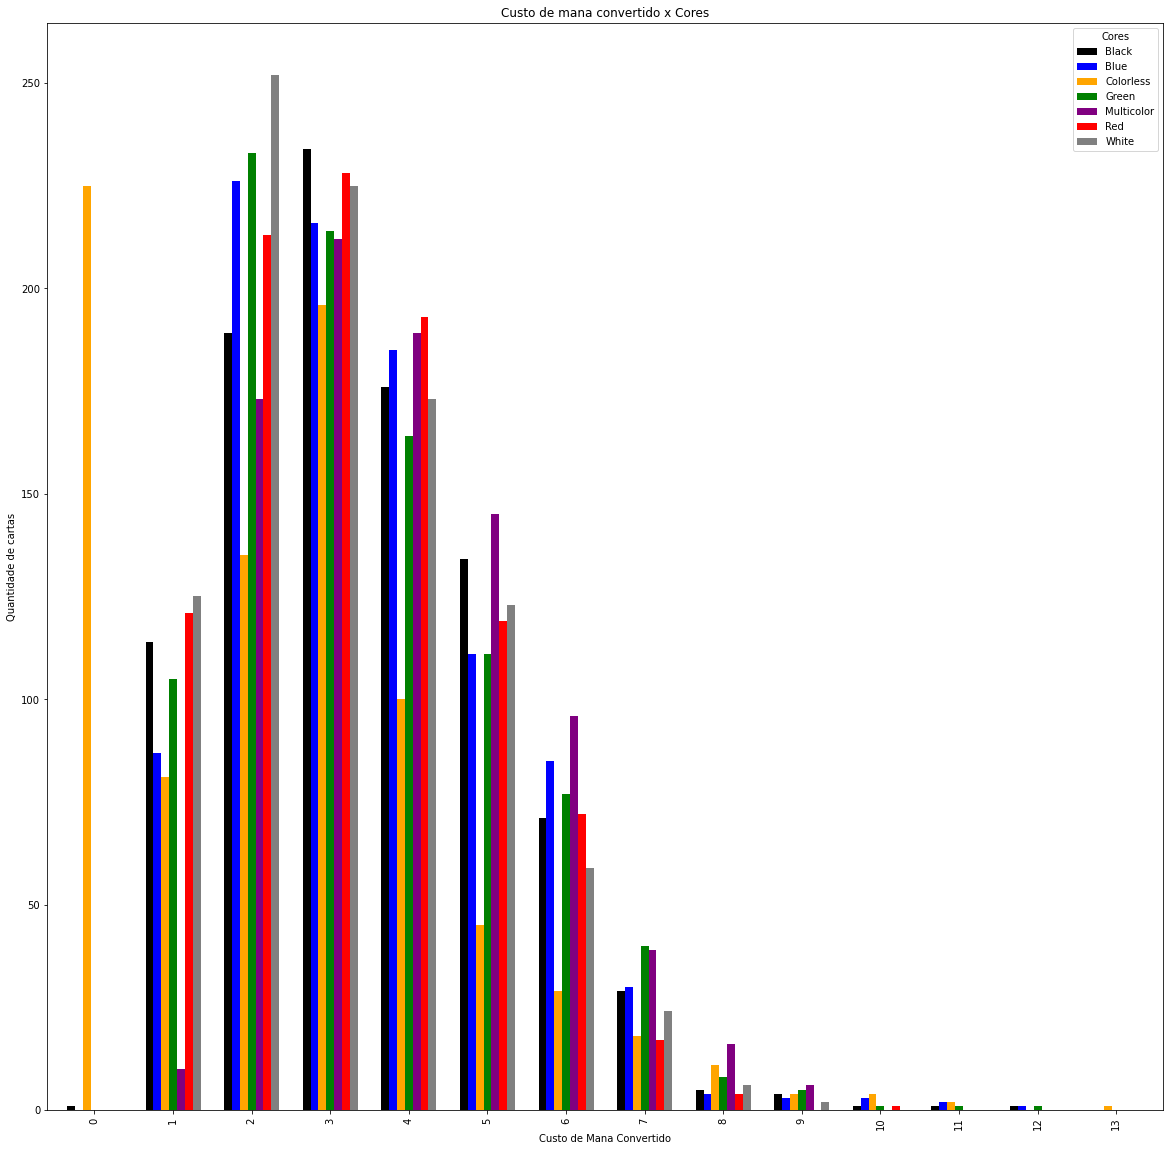

In [52]:
# Gráfico de uma tabulação cruzada
# Custo de Mana convertido x Cores
table = pd.crosstab(cards['convertedManaCost'], cards['Cores'])
table.plot(kind='bar', 
           width=0.7, 
           figsize=(20,20), 
           color=['black','blue','orange','green','purple','red','gray'],
           title='Custo de mana convertido x Cores',
           ylabel='Quantidade de cartas',
           xlabel='Custo de Mana Convertido')

<AxesSubplot:title={'center':'Custo de Mana Convertido x Tipo'}, xlabel='Custo de mana convertido', ylabel='Quantidade de Cartas'>

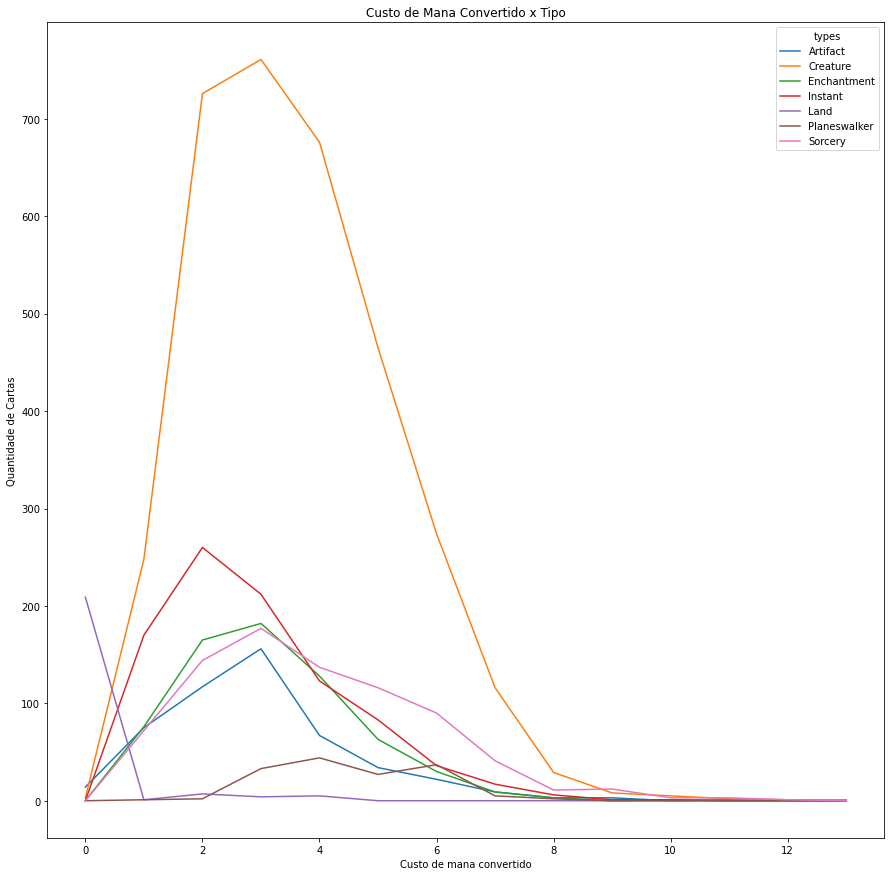

In [53]:
# Cruzamento entre custo de mana convertido com o tipo da carta
pd.crosstab(cards['convertedManaCost'], cards['types']).plot(kind='line',
                                                             figsize=(15,15), 
                                                             ylabel='Quantidade de Cartas', 
                                                             xlabel='Custo de mana convertido',
                                                             title='Custo de Mana Convertido x Tipo')

<AxesSubplot:title={'center':'Quantiodade de PW x Cores'}, xlabel='Cores', ylabel='Quantidade de Planeswalker'>

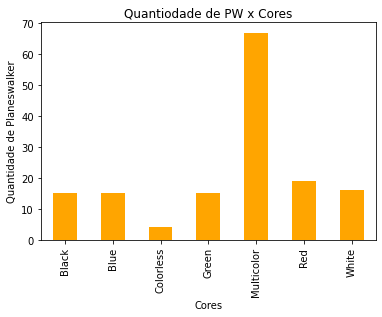

In [54]:
# Planeswalker x Cores
# Podemos plotar gráficos a partir de pivot_table
planeswalker_df.pivot_table('name', index=['Cores'], aggfunc='count').plot(kind='bar',
                                                                           color='Orange',
                                                                           legend=False,
                                                                           ylabel='Quantidade de Planeswalker',
                                                                           title='Quantiodade de PW x Cores')

array([<AxesSubplot:ylabel='name'>], dtype=object)

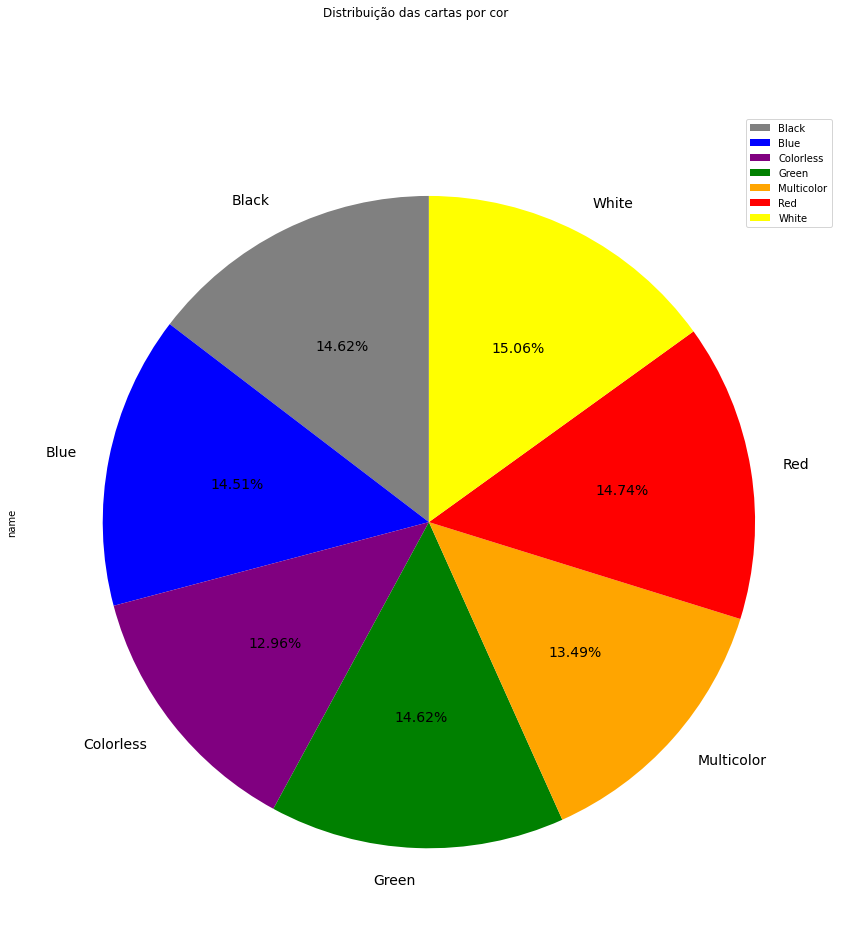

In [55]:
# Testando outros tipos de gráficos: tipo pizza
# Distribuição de carta por cor
cards.pivot_table('name', index=['Cores'], aggfunc='count').plot(kind='pie',
                                                                 subplots=True,
                                                                 figsize=(15,15),
                                                                 colors=['gray','blue','purple','green','orange','red','yellow'],
                                                                 autopct= "%.2f%%",
                                                                 title='Distribuição das cartas por cor',
                                                                 startangle=90,
                                                                 fontsize=14)

# Trabalhando com a biblioteca do Matplotlib

In [56]:
# Importando a biblioteca
import matplotlib.pyplot as plt

### Gráficos dados Categóricos
Trabalha com gráficos de barras
Ideal para **comparação** de valores
Normalmente utilizado para visualizar frequencia ou percnetual de valores.
No nosso exemplo, iremos utilizar para representar o **tipo x qtd de cartas**.

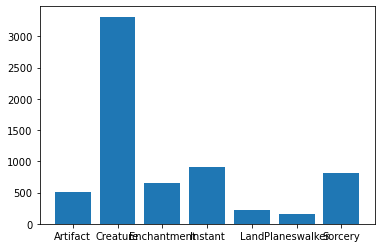

In [141]:
%matplotlib inline

# Criando uma pivot_table para pegar as informações de tipo e qt de cartas
qtd_tipos_df = cards.pivot_table('name', index=['types'], aggfunc='count')

# Adicionando os valores das listas em variáveis
grupos = qtd_tipos_df.index
valores = qtd_tipos_df['name']

# Plotando o gráfico em barra
plt.bar(grupos,valores)
plt.show()

- Como a visualização ficou ruim, para nomes muito grandes recomenda-se utilizar o gráfico de barras na horizontal

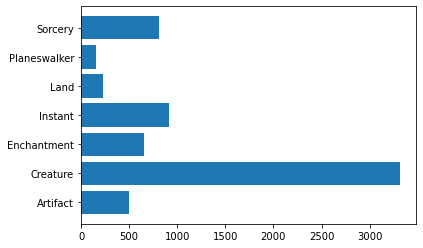

In [142]:
# Gráfico em barra na horizontal
plt.barh(grupos,valores)
plt.show()

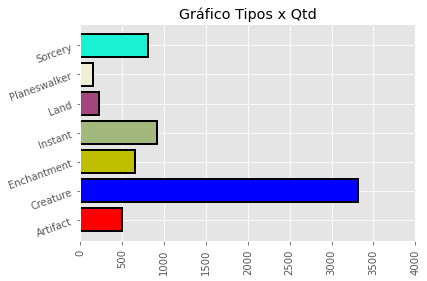

In [198]:
# Trabalhando na interface
# Usando um estilo mais bonito que o padrão
plt.style.use('ggplot') 
lista_cores = ['r','b','y','#a3b87c', '#a3467c', '#eff0d2','#1af0d2']

# Criando o gráfico em barra passando os valores, mudando as cores das barras, colocando borda e alterando o tamanho da borda
plt.barh(grupos,valores, color=lista_cores, edgecolor='black', linewidth=2) 

# Adicionando um título
plt.title('Gráfico Tipos x Qtd')

# Rotacionando em 20 graus os labels do eixo Y
plt.yticks(rotation=20)

# Rotacionando em 90 graus os labels do eixo X
plt.xticks(rotation=90)

# Definindo os valores limites do eixo isso, de 0 até 4000
plt.xlim(0, 4000)

# Mostrando o gráfico
plt.show()

Não está esticamente bonito, porém o intuito foi utilizar várias atributos/metodos possíveis.

### Gráfico de Pizza

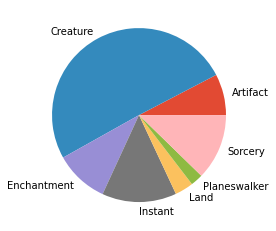

In [200]:
plt.pie(valores, labels=grupos)
plt.show()

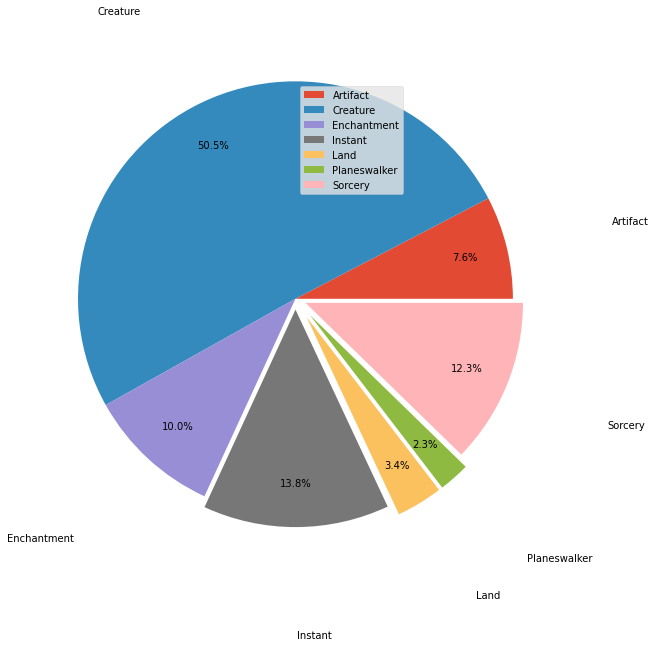

In [252]:
# Trabalhando com mais detalhamentos

# Definindo o explode das partes do gráfico
explode = (0, 0, 0, 0.1, 0.2, 0.2, 0.1)

# Configurações do gráfico pizza
# autopact: mostrar a % das fatias
# pctdistance: define a distancia do centro do circulo que o valor da % vai ficar
# labeldistance: define a distancia do barda da circunferência que o label da pizza irá ficar
# Explode: serve para dar o espaçamento entre as fatias da pizza para destacar um ou mais itens
# Radius: Tamanho do gráfico
plt.pie(valores, labels=grupos, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.5 ,explode=explode, radius=2)

# Adiciona a legenda
# Loc: é a posição onde vai ficar a box das legendas
plt.legend(grupos, loc=2)

# Tamanho [xmin, xmax, ymin, ymax]
plt.axis([0, 2, 0, 2]) 
plt.show()

# Trabalhando com SUBPLOTS

In [300]:
# Criando os Dataframes das cores Preta, Azul e Verde 
lack_df = cards.loc[cards['Cores'] == 'Black']
blue_df = cards.loc[cards['Cores'] == 'Blue']
green_df = cards.loc[cards['Cores'] == 'Green']

In [305]:
# Criando a tabela pivot com agregação para contar as cartas pelo seu tipo
black_pivot = black_df.pivot_table('name', index=['types'], aggfunc='count')
blue_pivot = blue_df.pivot_table('name', index=['types'], aggfunc='count')
red_pivot = cards[cards['Cores'] == 'Red'].pivot_table('name', index=['types'], aggfunc='count')
green_pivot = cards.loc[cards['Cores'] == 'Green'].pivot_table('name', index=['types'], aggfunc='count')


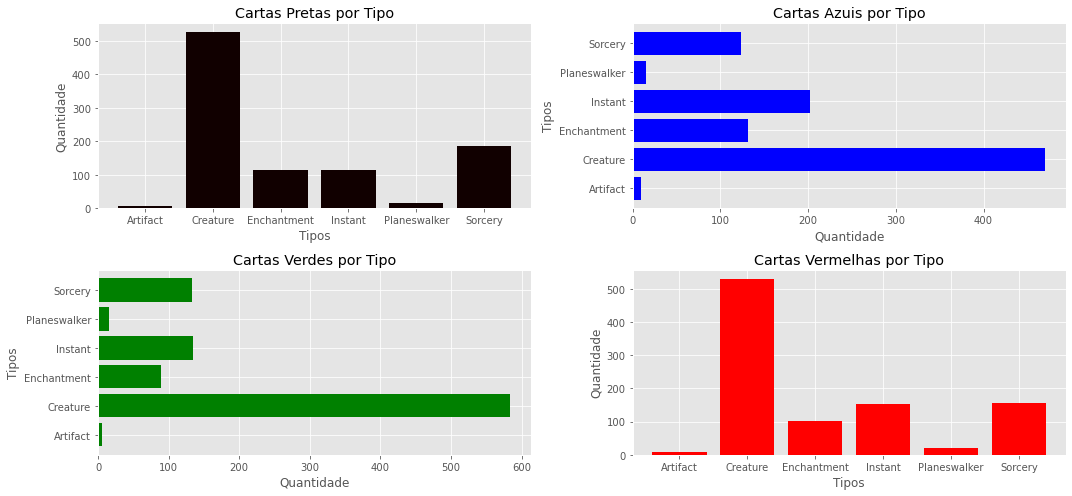

In [313]:
# Criando um subplot de 2 linhas x 2 colunas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,7))

# Crianda gráficos para cada espaço dessas 2 linhas e 2 colunas
ax1.bar(black_pivot.index, black_pivot['name'], color='#110000')
ax2.barh(blue_pivot.index, blue_pivot['name'], color='b')
ax3.barh(green_pivot.index, green_pivot['name'], color='g')
ax4.bar(red_pivot.index, red_pivot['name'], color='r')

# Configurando título e rótulos.
ax1.set(title='Cartas Pretas por Tipo', xlabel='Tipos', ylabel='Quantidade')
ax2.set(title='Cartas Azuis por Tipo', xlabel='Quantidade', ylabel='Tipos')
ax3.set(title='Cartas Verdes por Tipo', xlabel='Quantidade', ylabel='Tipos')
ax4.set(title='Cartas Vermelhas por Tipo', xlabel='Tipos', ylabel='Quantidade')

# Arrumando o plot para não ficar nada sobreposto
plt.tight_layout()
plt.show()
